# **Mielage Prediction - Regression Analysis**

**Objective** :- Develop a mileage prediction model using multiple linear regression analysis to estimate the miles per gallon (mpg) of vehicles based on various features, including engine displacement, horsepower, vehicle weight, and acceleration. The model will leverage historical data on these vehicle characteristics and their corresponding mpg values to establish a statistical relationship

**Dataset :-** https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv

### **IMPORT LIBRARY**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.preprocessing import StandardScaler

### **IMPORT DATA**

In [175]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [176]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [177]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

### **DATA PREPROCESSING**

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [179]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [180]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [181]:
# removing non numeric columns
df = df.drop(columns=['name','origin'])

### **REMOVING MISSING VALUES**

In [182]:
df = df.dropna()

In [183]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [184]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


### **DATA VISUALIZATION**

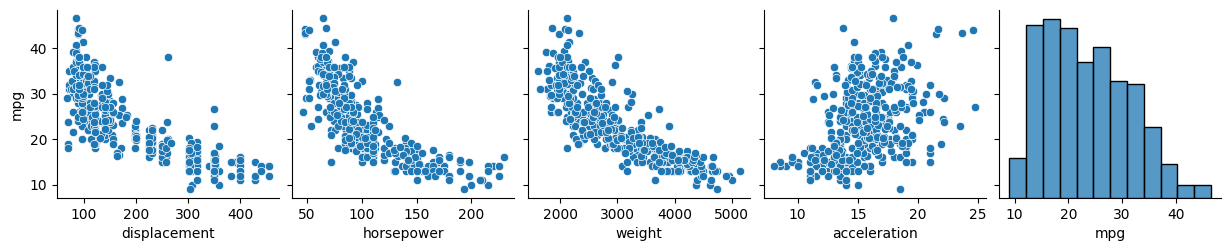

In [186]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

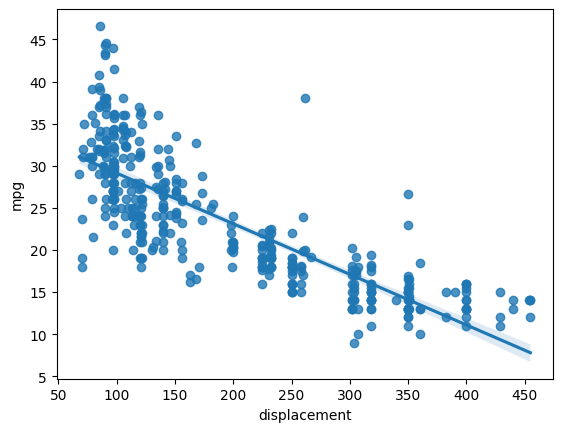

In [187]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

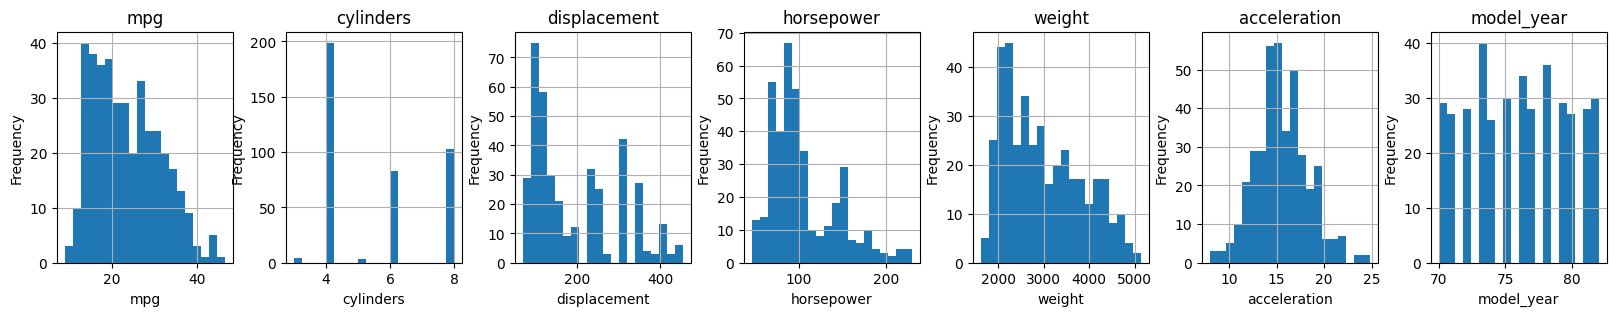

In [188]:
import matplotlib.pyplot as plt
import pandas as pd

def histplot(df, listvar):
    fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
    counter = 0
    for ax in axes:
        df.hist(column=listvar[counter], bins=20, ax=ax)
        ax.set_ylabel('Frequency')
        ax.set_xlabel(listvar[counter])
        counter += 1
    plt.show()

numeric_vars = df.select_dtypes(include=[np.number]).columns
histplot(df, numeric_vars)


### **DEFINE TARGET VARIABLE Y AND FEATURE X**

In [189]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [190]:
y = df['mpg']

In [191]:
y.shape

(392,)

In [192]:
x = df[['displacement','horsepower','weight','acceleration']]

In [193]:
x.shape

(392, 4)

### **SCALING DATA**

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
ss = StandardScaler()

In [196]:
x = ss.fit_transform(x)

In [197]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


### **TRAIN TEST SPLIT DATA**

In [198]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=2529)

In [199]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((274, 4), (274,), (118, 4), (118,))

## **MODELING**

### **LINEAR REGRESSION MODEL**

In [200]:
reg = LinearRegression()

In [201]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [202]:
reg.intercept_

23.485738559737584

In [203]:
reg.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

### **PREDICTION**

In [204]:
y_pred = reg.predict(xtest)

In [205]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

### **MODEL ACCURACY**

In [206]:
mean_absolute_error(ytest,y_pred)

3.3286968643244106

In [207]:
mean_absolute_percentage_error(ytest,y_pred)

0.14713035779536746

In [208]:
r2_score(ytest,y_pred)

0.7031250746717691

### **EXPLAINATION**

The "Mileage Prediction - Regression Analysis" project aims to develop a smart tool that can accurately predict a vehicle's fuel efficiency or miles per gallon (mpg) based on various features such as engine displacement, horsepower, weight, and acceleration. By employing advanced regression techniques and analyzing historical data, this tool can uncover the intricate relationships between a car's characteristics and its mileage. With this insightful information, users can make informed decisions when purchasing a vehicle, choosing the one that offers optimal fuel efficiency and long-distance travel on a single tank of gas.